# Accessing and Displaying Space Weather Datasets with LaTiS
This notebook will demonstrate how to access and display datasets from LASP's [Space Weather Data Portal](https://lasp.colorado.edu/space-weather-portal) using LaTiS with Python.

The "About LaTiS" section describes the LaTiS service interface. 

The "Using LaTiS with Python" section shows how to interact with LaTiS through Python code.

## About LaTiS

### Overview
LaTiS is an [API](https://en.wikipedia.org/wiki/Application_programming_interface) that allows software programs to access datasets from a variety of projects. We discuss the [Space Weather Data Portal](https://lasp.colorado.edu/space-weather-portal) here, but there are LaTiS servers deployed for many other projects (e.g., [LISIRD](https://lasp.colorado.edu/lisird/)). LaTiS implements a [Functional Data Model](https://github.com/latis-data/latis/blob/master/README.md) that provides customizable data access with a query language that expresses its "functional algebra." Clients can query LaTiS with URLs that:

 - select a dataset
 - specify the desired variables
 - specify the desired subset
 - pass the result through a number of other operations
 - specify an output format

### LaTiS usage
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><b style="font-family: 'Courier New', monospace; color: blue;">baseURL</b>/<b style="font-family: 'Courier New', monospace; color: blue;">dataset</b>.<b style="font-family: 'Courier New', monospace; color: blue;">suffix</b>?<b style="font-family: 'Courier New', monospace; color: blue;">projection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">selection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">operation</b></pre>

<br>

#### _baseURL_: 
The URL to the LaTiS server. For the Space Weather Data Portal, it is: https://lasp.colorado.edu/space-weather-portal/latis/dap/. Other projects have their own unique base URLs.

#### _dataset_
The dataset to request (see <a href="#datasets">Available datasets</a>).

#### _suffix_
Type of output (see <a href="#suffix">Output options</a>).

#### _projection_
Comma-separated list of variables to return. Default to all.
The Dataset Descriptor Structure (DDS) will describe the variables for each dataset. Use the _.dds_ suffix to get a dataset's DDS.

#### _selection_
Zero or more relative constraints on a variable (e.g. `&time<=2010-01-01T12:00` or `&irradiance>1360`). Each must be separated by an '&'.

#### _operation_
Zero or more other operations to be applied to the data (see <a href="#operation">Operation options</a>). Each must be separated by an '&'.

LaTiS URLs are also useful for accessing data from the command line (see <a href="#wget-and-curl">Using LaTiS with wget and curl</a>). 

### Example LaTiS URLs
Below are example LaTiS URLs that follow the syntax described above. Note that LaTiS queries begin after `/latis/dap/` in the URL. Also note that all time variables are simply named `time` and follow the [ISO 8601 date format](https://en.wikipedia.org/wiki/ISO_8601). Projections, selections, and other operations begin after `?` in the URL and are all separated by ampersands (&).

**First ten responses before 2005 from the Kyoto DST Index dataset, keeping only "time" and "dst" variables, in CSV format:**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/space-weather-portal/latis/dap/kyoto_dst_index.csv?time,dst&time&lt2005&limit(10)">https://lasp.colorado.edu/space-weather-portal/latis/dap/kyoto_dst_index.csv?time,dst&time&lt2005&limit(10)</a></pre>

<br>

**Changing NOAA GOES15 X-Ray Sensor Flares time format and displaying data from January 2, 2020:**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/space-weather-portal/latis/dap/noaa_goes15_xrs_1m.json?time%3E=2020-01-02&time%3C=2020-01-03&formatTime(yyyy:MM:DD)">https://lasp.colorado.edu/space-weather-portal/latis/dap/noaa_goes15_xrs_1m.json?time>=2020-01-02&time<=2020-01-03&formatTime(yyyy:MM:DD)</a></pre>

<br>

**Dataset Descriptor Structure for ACE Magnetic Field 16-Second Level 2 Data:**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/space-weather-portal/latis/dap/ac_h0_mfi.dds">https://lasp.colorado.edu/space-weather-portal/latis/dap/ac_h0_mfi.dds</a></pre>

<br>

**Renaming "time" and "url" variables to "earth_relative_thingy" and "internet_search_thingy" respectively in SWT BFIELD dataset for the first 50 entries:**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/space-weather-portal/latis/dap/swt_bfield_maps.csv?rename(time,earth_relative_thingy)&rename(url,internet_search_thingy)&limit(50)">https://lasp.colorado.edu/space-weather-portal/latis/dap/swt_bfield_maps.csv?rename(time,earth_relative_thingy)&rename(url,internet_search_thingy)&limit(50)</a></pre>

### Available datasets<a class="anchor" id="datasets"></a>

<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/space-weather-portal/latis/dap/<b style="font-family: 'Courier New', monospace; color: blue;">dataset</b>.suffix?projection&selection&operation</pre>

<br>

Navigate to the Space Weather Data Portal's [LaTiS landing page](https://lasp.colorado.edu/space-weather-portal/latis/dap/) to view the available datasets served by LaTiS. To access a dataset, substitute in its name exactly as written for the `dataset` portion of a query URL.

### Output options (_suffix_)<a class="anchor" id="suffix"></a>


<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/space-weather-portal/latis/dap/dataset.<b style="font-family: 'Courier New', monospace; color: blue;">suffix</b>?projection&selection&operation</pre>

<br>

#### _.asc_
ASCII representation reflecting how the dataset is modeled

#### _.bin_
Binary stream in network byte order (big-endian)

#### _.csv_
Comma delimited ASCII with simple header

#### _.das_
DAP2 standard Dataset Attribute Structure with metadata only

#### _.dds_
DAP2 standard Dataset Descriptor Structure with structure metadata only

#### _.dods_
DAP2 standard data output

#### _.html_
HTML landing page for a dataset

#### _.json_
JSON with labels

#### _.jsona_
JSON as arrays

#### _.jsond_
JSON with metadata and arrays of data

#### _.nc_
NetCDF file

#### _.tab_
Tab delimited ASCII with no header

#### _.txt_
Comma delimited ASCII with no header

#### _.zip_
Zip file, available only for file list datasets


### Operation options<a class="anchor" id="operation"></a>

<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/space-weather-portal/latis/dap/dataset.suffix?projection&selection&<b style="font-family: 'Courier New', monospace; color: blue;">operation</b></pre>

<br>

Below are the operations from LaTiS's query language available to Space Weather Data Portal datasets. **Please note that this query language is distinct from a finite set of key parameters. Not all combinations of operations will be valid, and some operations only work on certain types of data.**

<br>

#### Time conversions

##### _convertTime_
Convert time values to the given units

_Usage:_ `&convertTime(time,units)`, where units is duration units since an epoch (e.g. "milliseconds since 1970-01-01"). Note that the first argument should almost always be the word `time` since all LaTiS time variable names have the alias "time".

##### _convertTimeTupleToTime_
Transform Tuples of date-time components into Time scalars

_Usage:_ `&convertTimeTupleToTime()`

##### _formatTime_
Convert time values to the given format (for text output) as specified by [Java's SimpleDateFormat](https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html)

_Usage:_ `&formatTime(format)`, e.g. `formatTime(yyyy-MM-dd'T'HH:mm:ss.SSS)`

<br>

#### Filters

##### _contains_
Return samples where the given variable has one of the given values

_Usage:_ `&contains(name, v1, v2, ...)`

##### _drop_
Return all but the first n samples

_Usage:_ `&drop(n)`

##### _excludeMissing_
Exclude all samples that contain a missing value

_Usage:_ `&excludeMissing()`

##### _first_
Return the first sample

_Usage:_ `&first()`

##### _last_
Return the last sample

_Usage:_ `&last()`

##### _max_
Return the samples that have the maximum value for a given variable

_Usage:_ `&max(name)`

##### _maxDelta_
Filter out samples where the change between samples for a given variable exceeds a given value

_Usage:_ `&maxDelta(name,value)`

##### _min_
Return the samples that have the minimum value for a given variable

_Usage:_ `&min(name)`

##### _project_
Return only the given variables, does not change order (redundant if projections were already specified in the query URL)

_Usage:_ `&project(v1,v2,...)`

##### _select_
Filter samples given a predicate (e.g. time>0). This operation is usually not used since most predicates (e.g. time selections) can be specified directly in the query URL.

_Usage:_ `&select(predicate)`, e.g. `select(time<2000-01-01)`

##### _stride_
Return every nth sample

_Usage:_ `&stride(n)`

##### _take_
Return the first n samples

_Usage:_ `&take(n)`

##### _takeRight_
Return the lattermost n samples

_Usage:_ `&takeRight(n)`

<br>

#### Miscellaneous

##### _appendText_
Append the given text to the value of the given text variable

_Usage:_ `&appendText(variable,text)`

##### _binAverageByWidth_
Bin the samples by a given width, with optional start value, in the units of the domain variable and compute the mean, min, max, and count of the range values in each bin

_Usage:_ `&binAverageByWidth(width, start)`

##### _derive_
Derive a new variable in terms of other variables

_Usage:_ `&derive(expression)`, e.g. `derive(a/b+1)`

##### _domBin_
Add bin semantics to the domain variable by adding min and max variables to the range to specify the coverage of each bin

_Usage:_ `&domBin(start|end,fill)`

##### _integrate_
Integrate a nested function over an optional range of domain values

_Usage:_ `&integrate(v1,v2)`

##### _pivot_
Transform a range of a single variable into a tuple where each element corresponds to one of n values of the given domain variable

_Usage:_ `&pivot(name, n)`

##### _rename_
Change the name of a given variable

_Usage:_ `&rename(old,new)`

##### _replaceMissing_
Replace any missing value with the given value

_Usage:_ `&replaceMissing(value)`

##### _replaceValue_
Replace every occurrence of a given value with another given value

_Usage:_ `&replaceValue(v1,v2)`

##### _roundWithPrecision_
Round values of the given variable to the given number of decimal places

_Usage:_ `&roundWithPrecision(name, value)`

##### _roundWithSigfigs_
Round values of the given variable to the given number of significant figures

_Usage:_ `&roundWithSigfigs(name, value)`

##### _total_
Sum the range values of all the samples into a single sample, using the last domain value

_Usage:_ `&total()`

## Using LaTiS with Python

First, our imports. We will use:
 - `pandas` to directly access LaTiS datasets
 - `requests` to download LaTiS dataset files
 - `matplotlib` to plot datasets

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

### Accessing data
As we saw above, the structure of a LaTiS query is:
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/space-weather-portal/latis/dap/<b style="font-family: 'Courier New', monospace; color: blue;">dataset</b>.<b style="font-family: 'Courier New', monospace; color: blue;">suffix</b>?<b style="font-family: 'Courier New', monospace; color: blue;">projection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">selection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">operation</b></pre>

<br>

We can retrieve data from any valid LaTiS query URL. In Python, a couple good options are to:

1. Read the dataset directly into a pandas DataFrame
2. Download the data into a temporary file, then work with the file

**Option #1 will generally be the better option** in Python since pandas is the standard library for data processing ([see their documentation](https://pandas.pydata.org/docs/)). We'll show both options but start with pandas.

We can write LaTiS query URLs by hand, or, since their structure is fixed, we may want to use a helper method like the following to make them easier to generate:



In [ ]:
def latis_query_url(dataset, suffix="csv", projections=[], min_time="", max_time="", operations=[]):
    """Generates a LaTiS Space Weather Data Portal query URL with the given components."""
    base = "https://lasp.colorado.edu/space-weather-portal/latis/dap/"
    query = base + dataset + "." + suffix + "?"
    if projections:
        query += ",".join(projections)
    if min_time:
        query += "&time>=" + min_time  # note: could use "time>"
    if max_time:
        query += "&time<" + max_time   # note: could use "time<="
    if operations:
        query += "&" + "&".join(operations)
    return query

#### Accessing with `pandas`

We can get a pandas DataFrame containing our dataset with pandas's [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method. Note that we'll use the "csv" suffix in the LaTiS query. 

(Also note that pandas can read [more formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) than CSV, but CSV is the most straightforward and performant.)

In [ ]:
query = "https://lasp.colorado.edu/space-weather-portal/latis/dap/kyoto_dst_index.csv?time,dst&time<2005&limit(10)"
data = pd.read_csv(query, parse_dates=[0], index_col=[0]) 
print(data)

                                dst (nT)
time (yyyy-MM-dd HH:mm:ss.SSS)          
1957-01-01 00:00:00                 11.0
1957-01-01 01:00:00                 13.0
1957-01-01 02:00:00                 12.0
1957-01-01 03:00:00                 12.0
1957-01-01 04:00:00                  9.0
1957-01-01 05:00:00                  7.0
1957-01-01 06:00:00                  7.0
1957-01-01 07:00:00                  6.0
1957-01-01 08:00:00                  2.0
1957-01-01 09:00:00                 -1.0


#### Accessing with `requests`

We can use Python's built-in `requests` library to store LaTiS datasets as files. The `requests.get()` call returns a [response object](https://docs.python-requests.org/en/latest/user/quickstart/#response-content), where the file contents are stored in a `.content` object. The following code accesses the same data we just saw but saves it in a JSON arrays (.jsona) file:

In [ ]:
# Same query as above except with "jsona" suffix
query = latis_query_url("kyoto_dst_index", "jsona", projections=["time", "dst"], max_time="2005", operations=["limit(10)"])
res = requests.get(query)
open('kyoto.json', 'wb').write(res.content)  # Note, saves in the current working directory

216

The `requests` approach is useful when our analysis requires working with files in specific formats, as the LaTiS service interface can output data in a variety of formats (see <a href="#suffix">Output options</a> above). If we end up needing to manipulate the data after it's been downloaded, we can always load it back into a DataFrame:

In [ ]:
data = pd.read_json('kyoto.json')
data.columns = ["time (seconds since 1970-01-01)", "dst (nT)"]
data.set_index("time (seconds since 1970-01-01)", inplace=True)
print(data)

                                 dst (nT)
time (seconds since 1970-01-01)          
-410227200000                          11
-410223600000                          13
-410220000000                          12
-410216400000                          12
-410212800000                           9
-410209200000                           7
-410205600000                           7
-410202000000                           6
-410198400000                           2
-410194800000                          -1


### Manipulating data

We have a variety of options for manipulating our data. We can:

- Apply server-side LaTiS <a href="#operation">operations</a> to the data
- [Manipulate](https://pandas.pydata.org/docs/user_guide/indexing.html) the pandas DataFrame
- Manipulate lists extracted from the DataFrame

Let's look at ways to do the following three tasks, using each of the different manipulation methods mentioned above:
 1. Get all the values of a single variable
 2. Get the first row of a dataset
 3. Get the last five rows of a dataset

#### 1) Three ways to: Get all the values of the "longwave" variable

In [ ]:
# Applying LaTiS operation (projection)
query1 = latis_query_url("noaa_goes15_xrs_1m", "csv", projections=["longwave"], min_time="2020-01-02T00:00", max_time="2020-01-02T00:05")
data = pd.read_csv(query1) 
data  # pandas DataFrame

,longwave (W/m^2)
0,1.194743e-08
1,7.534960e-09
2,6.756289e-09
3,7.132646e-09
4,9.481637e-09


In [ ]:
# Slicing the DataFrame
query2 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02T00:00", max_time="2020-01-02T00:05")
df = pd.read_csv(query2) 
data = df["longwave (W/m^2)"]
data  # pandas Series

0    1.194743e-08
1    7.534960e-09
2    6.756289e-09
3    7.132646e-09
4    9.481637e-09
Name: longwave (W/m^2), dtype: float64

In [ ]:
# Slicing lists extracted from the DataFrame
query3 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02T00:00", max_time="2020-01-02T00:05")
df = pd.read_csv(query3, index_col=[0])
lists = df.values.tolist()
data = [row[1] for row in lists]
print(data)  # List

[1.1947428e-08, 7.5349602e-09, 6.7562889e-09, 7.1326465e-09, 9.4816368e-09]


#### 2) Three ways to: Get the first row of the dataset

In [ ]:
# Applying LaTiS operation (first)
query1 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02", max_time="2020-01-03", operations=["first()"])
data = pd.read_csv(query1) 
data  # pandas DataFrame

,time (seconds since 2000-01-01 12:00:00),shortwave (W/m^2),longwave (W/m^2),shortwave_flag,longwave_flag,shortwave_masked (W/m^2),longwave_masked (W/m^2)
0,631195200.0,1.000000e-09,1.194743e-08,16,16,1.000000e-09,1.194743e-08


In [ ]:
# Slicing the DataFrame
query2 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02", max_time="2020-01-03")
df = pd.read_csv(query2) 
data = df.head(1)
data  # pandas DataFrame

,time (seconds since 2000-01-01 12:00:00),shortwave (W/m^2),longwave (W/m^2),shortwave_flag,longwave_flag,shortwave_masked (W/m^2),longwave_masked (W/m^2)
0,631195200.0,1.000000e-09,1.194743e-08,16,16,1.000000e-09,1.194743e-08


In [ ]:
# Slicing lists extracted from the DataFrame
query3 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02", max_time="2020-01-03")
df = pd.read_csv(query3)
lists = df.values.tolist()
data = lists[0]
print(data)  # List

[631195200.0, 9.9999997e-10, 1.1947428e-08, 16.0, 16.0, 9.9999997e-10, 1.1947428e-08]


#### 3) Three ways to: Get the last five rows of the dataset

In [ ]:
# Applying LaTiS operation (takeRight(5))
query1 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02", max_time="2020-01-03", operations=["takeRight(5)"])
data = pd.read_csv(query1) 
data  # pandas DataFrame

,time (seconds since 2000-01-01 12:00:00),shortwave (W/m^2),longwave (W/m^2),shortwave_flag,longwave_flag,shortwave_masked (W/m^2),longwave_masked (W/m^2)
0,631281300.0,1.000000e-09,2.025325e-08,16,16,1.000000e-09,2.025325e-08
1,631281360.0,1.000000e-09,2.583373e-08,16,16,1.000000e-09,2.583373e-08
2,631281420.0,1.000000e-09,1.376433e-08,16,16,1.000000e-09,1.376433e-08
3,631281480.0,1.000000e-09,7.509004e-09,16,16,1.000000e-09,7.509004e-09
4,631281540.0,1.000000e-09,7.405181e-09,16,16,1.000000e-09,7.405181e-09


In [ ]:
# Slicing the DataFrame
query2 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02", max_time="2020-01-03")
df = pd.read_csv(query2, index_col=[0]) 
data = df.iloc[-5:]
data  # pandas DataFrame

,shortwave (W/m^2),longwave (W/m^2),shortwave_flag,longwave_flag,shortwave_masked (W/m^2),longwave_masked (W/m^2)
time (seconds since 2000-01-01 12:00:00),,,,,,
631281300.0,1.000000e-09,2.025325e-08,16,16,1.000000e-09,2.025325e-08
631281360.0,1.000000e-09,2.583373e-08,16,16,1.000000e-09,2.583373e-08
631281420.0,1.000000e-09,1.376433e-08,16,16,1.000000e-09,1.376433e-08
631281480.0,1.000000e-09,7.509004e-09,16,16,1.000000e-09,7.509004e-09
631281540.0,1.000000e-09,7.405181e-09,16,16,1.000000e-09,7.405181e-09


In [ ]:
# Slicing lists extracted from the DataFrame
query3 = latis_query_url("noaa_goes15_xrs_1m", "csv", min_time="2020-01-02", max_time="2020-01-03")
df = pd.read_csv(query3)
lists = df.values.tolist()
data = lists[-5:]
print(data)  # List of Lists

[[631281300.0, 9.9999997e-10, 2.0253252e-08, 16.0, 16.0, 9.9999997e-10, 2.0253252e-08], [631281360.0, 9.9999997e-10, 2.5833726e-08, 16.0, 16.0, 9.9999997e-10, 2.5833726e-08], [631281420.0, 9.9999997e-10, 1.3764327e-08, 16.0, 16.0, 9.9999997e-10, 1.3764327e-08], [631281480.0, 9.9999997e-10, 7.5090041e-09, 16.0, 16.0, 9.9999997e-10, 7.5090041e-09], [631281540.0, 9.9999997e-10, 7.4051814e-09, 16.0, 16.0, 9.9999997e-10, 7.4051814e-09]]


Those were all examples of subsetting a dataset. **Notice how the LaTiS operation was the simplest option in each example.** Furthermore, notice that **we save network bandwidth using LaTiS operations because they are applied server-side** before the download occurs. The other methods require downloading more data than we end up keeping. The LaTiS service interface offers a variety of operations that go far beyond selecting subsets of data (see <a href="#operation">Operation options</a> above). Let's look at a few examples:

#### Other LaTiS operations

##### Format times as ISO 8601 strings (yyyy-MM-dd'T'HH:mm:ss.SSS)

In [ ]:
query = latis_query_url("kyoto_dst_index", min_time="2000-01-01T00:00:00.000", max_time="2000-01-01T03:00:00.000", operations=["formatTime(yyyy-MM-dd'T'HH:mm:ss.SSS)"])
data = pd.read_csv(query, index_col=[0]) 
data

,dst (nT)
time (yyyy-MM-dd'T'HH:mm:ss.SSS),
2000-01-01T00:00:00.000,-45.0
2000-01-01T01:00:00.000,-37.0
2000-01-01T02:00:00.000,-37.0


##### Format times as Unix timestamps (seconds since 1970-01-01)

In [ ]:
query = latis_query_url("kyoto_dst_index", min_time="2000-01-01T00:00:00.000", max_time="2000-01-01T03:00:00.000", operations=["convertTime(time,seconds since 1970-01-01)".replace(" ","%20")])  # spaces encoded to %20
data = pd.read_csv(query, index_col=[0]) 
data

,dst (nT)
time (seconds since 1970-01-01),
946684800.0,-45.0
946688400.0,-37.0
946692000.0,-37.0


##### Fill missing values with -99999

In [ ]:
query = latis_query_url("noaa_goes15_xrs_1m", min_time="2015-03-12T08:33", max_time="2015-03-12T08:36", operations=["replaceMissing(-99999)"])
data = pd.read_csv(query, parse_dates=[0], index_col=[0]) 
data

,shortwave (W/m^2),longwave (W/m^2),shortwave_flag,longwave_flag,shortwave_masked (W/m^2),longwave_masked (W/m^2)
time (seconds since 2000-01-01 12:00:00),,,,,,
479421180.0,1.065089e-07,0.000003,16,16,1.065089e-07,0.000003
479421240.0,9.961728e-08,0.000003,18,18,-9.999900e+04,-99999.000000
479421300.0,9.108221e-08,0.000003,18,18,-9.999900e+04,-99999.000000


##### Rename "time" and "url" variables to "earth_relative_thingy" and "internet_search_thingy" respectively (and limit to the first three rows)

In [ ]:
query = latis_query_url("swt_bfield_maps", operations=["rename(time,earth_relative_thingy)", "rename(url,internet_search_thingy)", "limit(3)"])
data = pd.read_csv(query) 
data

,earth_relative_thingy (yyyyMMdd_HHmm),internet_search_thingy
0,19890310_0000,https://swt-bfield-maps.s3.amazonaws.com/Bfiel...
1,19890310_0015,https://swt-bfield-maps.s3.amazonaws.com/Bfiel...
2,19890310_0030,https://swt-bfield-maps.s3.amazonaws.com/Bfiel...


### Plotting data 

We can plot data with pandas's built-in [`plot()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) method, which is just a simple wrapper around `matplotlib`'s [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [ ]:
data = pd.read_csv(latis_query_url("kyoto_dst_index", "csv", projections=["time", "dst"], max_time="1957-01-01T10:00"), parse_dates=[0], index_col=[0])

<AxesSubplot:xlabel='time (yyyy-MM-dd HH:mm:ss.SSS)'>

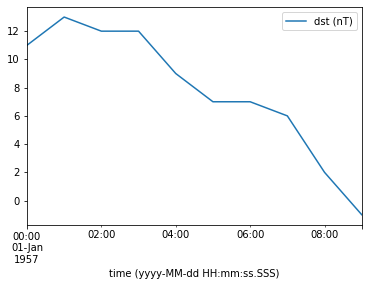

In [ ]:
# pandas
data.plot()

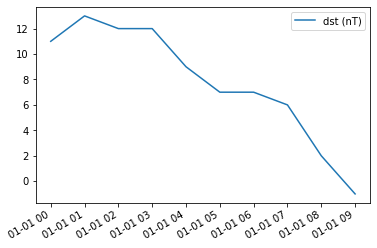

In [ ]:
# matplotlib
%matplotlib inline
plt.plot(data.index, data['dst (nT)'], label='dst (nT)')
plt.gcf().autofmt_xdate()
plt.legend()

Some LaTiS datasets are image datasets, like `swt_bfield_maps`, that contain rows of timestamped URLs. We can display the images at these URLs:

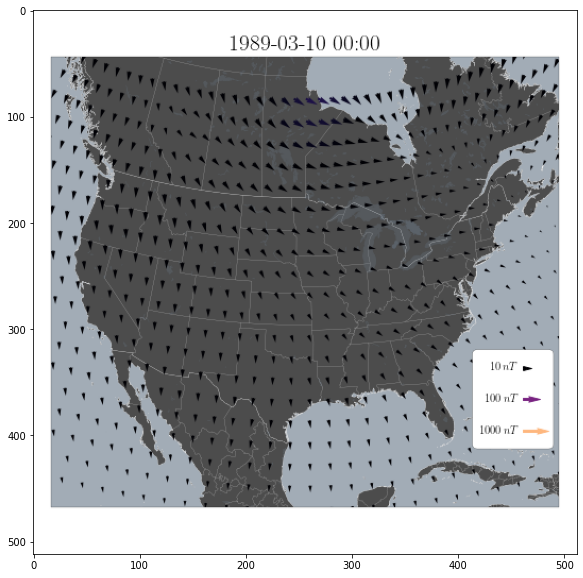

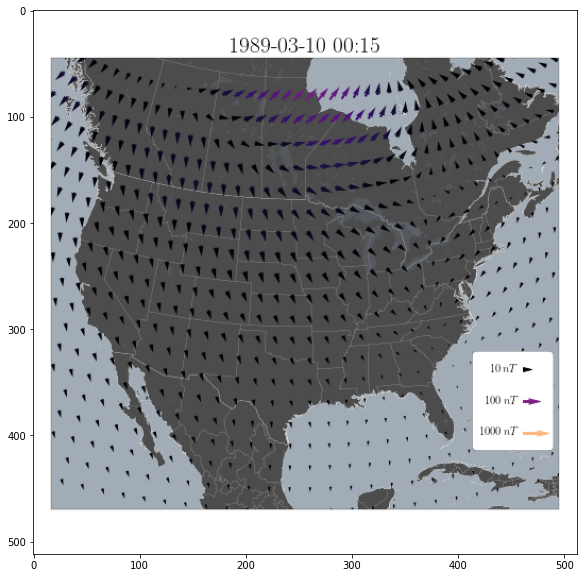

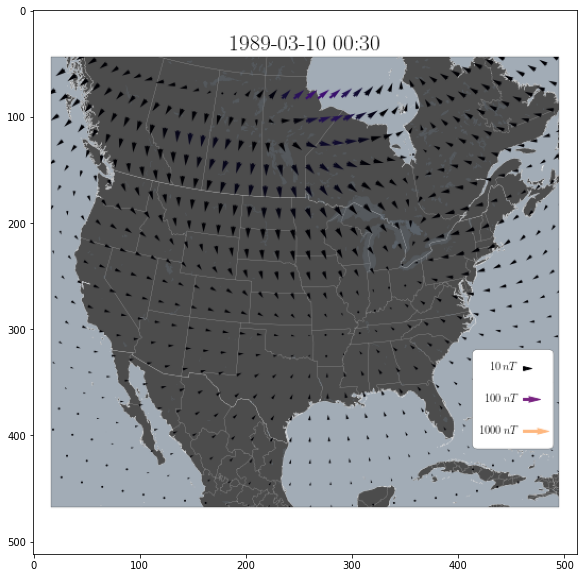

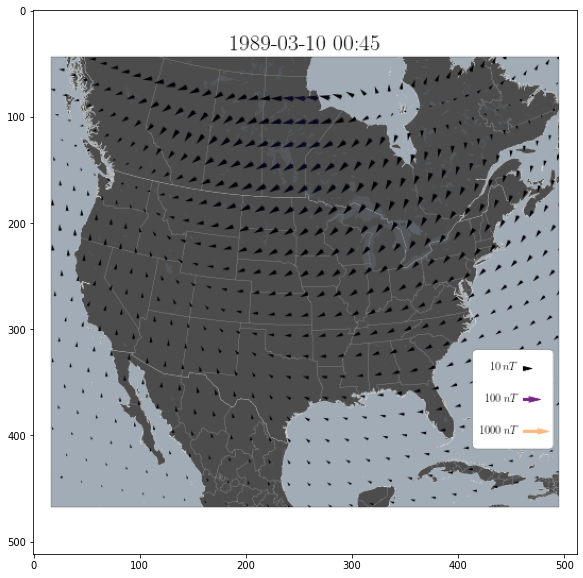

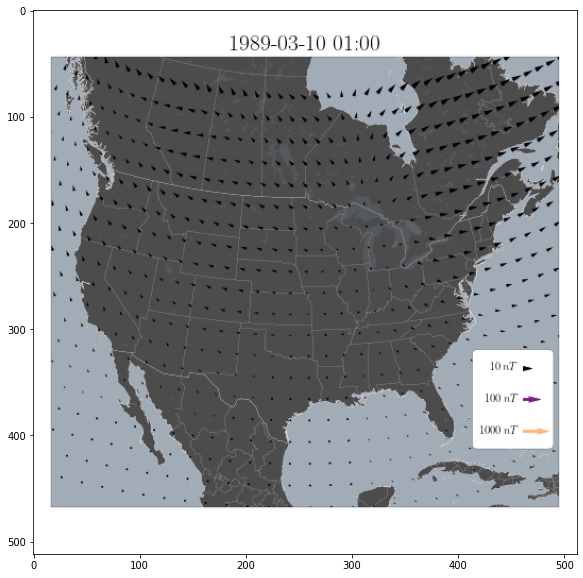

In [ ]:
import matplotlib.image as mpimg
import numpy as np
import PIL
import urllib

query = latis_query_url("swt_bfield_maps", projections=["url"], operations=["limit(5)"])
urls = pd.read_csv(query)["url"].tolist()

for url in urls:
    image = np.array(PIL.Image.open(urllib.request.urlopen(url))) # reading from URLs is deprecated: mpimg.imread(url)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

This was an introduction to accessing and displaying datasets from LASP's [Space Weather Data Portal](https://lasp.colorado.edu/space-weather-portal/home) using LaTiS with Python. Feel free to modify this notebook to play around with different datasets, time range selections, operations, etc. to see the results. Changes made to this notebook will not persist.